## Colin's Pipeline Experiments
### Objectives:
- Create a SingleImagePipeline so we can run fast-iteration experiments on just a single image
- Create a CentraPipeline that calls SingleImagePipeline
- Modularize the soccer_net_pipeline and migrate all operations to SingleImagePipeline
- Run all systematic ops from CentralPipeline (more than one tracklet)

### Main benefit from creating a `BatchImagePipeline` and a `CentralPipeline`
Decoupling large-scale systematic training versus testing. The main pipeline trains the model, creates output processed images and does so by systematically traversing all the tracklets. I want to be able to see what pre-processing is happening to the image so I can understand what is being fed to the model. I also just want to be able to pass a single raw image to the model so I can get fast results. Right now everything is coupled together by all the tracklets, and I don't want to traverse all of them or even a single tracklet, but maybe only a single image from a single tracklet.

### Quick Run Block

## Code

In [1]:
import sys
from pathlib import Path
import os

sys.path.append(str(Path.cwd().parent.parent))
print(str(Path.cwd().parent.parent))
print("Current working directory: ", os.getcwd())

from ModelDevelopment.CentralPipeline import CentralPipeline
from ModelDevelopment.ImageBatchPipeline import ImageBatchPipeline
from DataProcessing.DataPreProcessing import DataPaths

c:\Users\colin\OneDrive\Desktop\UBC\Jersey-Number-Recognition
Current working directory:  c:\Users\colin\OneDrive\Desktop\UBC\Jersey-Number-Recognition\ModelDevelopment\experiments


In [2]:
pipeline = CentralPipeline(
  input_data_path=DataPaths.TRAIN_DATA_DIR.value,
  output_processed_data_path=DataPaths.PROCESSED_DATA_OUTPUT_DIR_TRAIN.value,
  common_processed_data_dir=DataPaths.COMMON_PROCESSED_OUTPUT_DATA_TRAIN.value,
  gt_data_path=DataPaths.TRAIN_DATA_GT.value,
  single_image_pipeline=False,
  display_transformed_image_sample=True,
  num_image_samples=1,
  use_cache=False,
  suppress_logging=False
  )

2025-03-21 19:43:51 [INFO] DataPreProcessing initialized. Universe of available data paths:
2025-03-21 19:43:51 [INFO] ROOT_DATA_DIR: c:\Users\colin\OneDrive\Desktop\UBC\Jersey-Number-Recognition\data\SoccerNet\jersey-2023\extracted
2025-03-21 19:43:51 [INFO] TEST_DATA_GT: c:\Users\colin\OneDrive\Desktop\UBC\Jersey-Number-Recognition\data\SoccerNet\jersey-2023\extracted\test\test_gt.json
2025-03-21 19:43:51 [INFO] TRAIN_DATA_GT: c:\Users\colin\OneDrive\Desktop\UBC\Jersey-Number-Recognition\data\SoccerNet\jersey-2023\extracted\train\train_gt.json
2025-03-21 19:43:51 [INFO] TEST_DATA_DIR: c:\Users\colin\OneDrive\Desktop\UBC\Jersey-Number-Recognition\data\SoccerNet\jersey-2023\extracted\test\images
2025-03-21 19:43:51 [INFO] TRAIN_DATA_DIR: c:\Users\colin\OneDrive\Desktop\UBC\Jersey-Number-Recognition\data\SoccerNet\jersey-2023\extracted\train\images
2025-03-21 19:43:51 [INFO] CHALLENGE_DATA_DIR: c:\Users\colin\OneDrive\Desktop\UBC\Jersey-Number-Recognition\data\SoccerNet\jersey-2023\extr

2025-03-21 19:43:51 [INFO] Running the SoccerNet pipeline.
2025-03-21 19:43:51 [INFO] Using double parallelization: multiprocessing + CUDA batch processing.


Processing tracklets (CUDA + CPU):   0%|          | 0/2 [00:00<?, ?it/s]

2025-03-21 19:44:01 [INFO] Creating placeholder data files for Soccer Ball Filter.
2025-03-21 19:44:01 [INFO] Creating placeholder data files for Legibility Classifier.


Phase 1: Data Pre-Processing Pipeline Progress:   0%|          | 0/2 [00:00<?, ?it/s]

2025-03-21 19:44:01 [INFO] Removed cached tracklet feature file (use_cache: False): c:\Users\colin\OneDrive\Desktop\UBC\Jersey-Number-Recognition\data\SoccerNet\jersey-2023\processed_data\train\0\features.npy
2025-03-21 19:44:01 [INFO] Determine soccer balls in image(s) using pre-trained model.
2025-03-21 19:44:01 [INFO] Found 0 balls, Ball list: []


c:\Users\colin\miniconda3\envs\UBC\Lib\site-packages\pytorch_lightning\utilities\migration\migration.py:208: You have multiple `ModelCheckpoint` callback states in this checkpoint, but we found state keys that would end up colliding with each other after an upgrade, which means we can't differentiate which of your checkpoint callbacks needs which states. At least one of your `ModelCheckpoint` callbacks will not be able to reload the state.
Lightning automatically upgraded your loaded checkpoint from v1.1.4 to v2.5.0.post0. To apply the upgrade to your files permanently, run `python -m pytorch_lightning.utilities.upgrade_checkpoint c:\Users\colin\OneDrive\Desktop\UBC\Jersey-Number-Recognition\data\pre_trained_models\reid\dukemtmcreid_resnet50_256_128_epoch_120.ckpt`


using GPU
2025-03-21 19:44:03 [INFO] Saved features for tracklet with shape (1, 2048) to c:\Users\colin\OneDrive\Desktop\UBC\Jersey-Number-Recognition\data\SoccerNet\jersey-2023\processed_data\train\0\features.npy
2025-03-21 19:44:03 [INFO] Identifying and removing outliers by calling gaussian_outliers_streamlined.py on feature file
2025-03-21 19:44:10 [INFO] 
2025-03-21 19:44:10 [ERROR] 
2025-03-21 19:44:10 [INFO] Done removing outliers


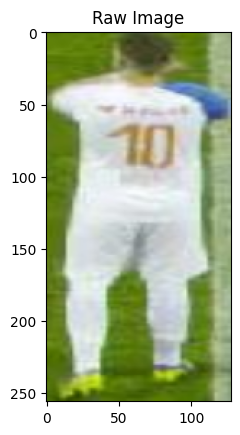

2025-03-21 19:44:10 [INFO] Running model chain on preprocessed image(s).
2025-03-21 19:44:10 [INFO] Classifying legibility of image(s) using pre-trained model.
2025-03-21 19:44:10 [WARNING] No soccer ball list found. Skipping exclusion of soccer balls.
2025-03-21 19:44:10 [INFO] Path checked: c:\Users\colin\OneDrive\Desktop\UBC\Jersey-Number-Recognition\data\SoccerNet\jersey-2023\processed_data\train\common_data\soccer_ball.json


c:\Users\colin\miniconda3\envs\UBC\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\colin\miniconda3\envs\UBC\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


2025-03-21 19:44:17 [INFO] Saving legible_tracklets to: c:\Users\colin\OneDrive\Desktop\UBC\Jersey-Number-Recognition\data\SoccerNet\jersey-2023\processed_data\train\0\legible_results.json
2025-03-21 19:44:17 [INFO] Saved legible_tracklets to: c:\Users\colin\OneDrive\Desktop\UBC\Jersey-Number-Recognition\data\SoccerNet\jersey-2023\processed_data\train\0\legible_results.json
2025-03-21 19:44:17 [INFO] Saving illegible_tracklets to: c:\Users\colin\OneDrive\Desktop\UBC\Jersey-Number-Recognition\data\SoccerNet\jersey-2023\processed_data\train\0\illegible_results.json
2025-03-21 19:44:17 [INFO] Saved illegible_tracklets to: c:\Users\colin\OneDrive\Desktop\UBC\Jersey-Number-Recognition\data\SoccerNet\jersey-2023\processed_data\train\0\illegible_results.json
2025-03-21 19:44:17 [INFO] Legibility classification complete.


Phase 1: Data Pre-Processing Pipeline Progress:  50%|█████     | 1/2 [00:15<00:15, 15.84s/it]

2025-03-21 19:44:17 [INFO] Removed cached tracklet feature file (use_cache: False): c:\Users\colin\OneDrive\Desktop\UBC\Jersey-Number-Recognition\data\SoccerNet\jersey-2023\processed_data\train\1\features.npy
2025-03-21 19:44:17 [INFO] Determine soccer balls in image(s) using pre-trained model.
2025-03-21 19:44:17 [INFO] Found 0 balls, Ball list: []


Lightning automatically upgraded your loaded checkpoint from v1.1.4 to v2.5.0.post0. To apply the upgrade to your files permanently, run `python -m pytorch_lightning.utilities.upgrade_checkpoint c:\Users\colin\OneDrive\Desktop\UBC\Jersey-Number-Recognition\data\pre_trained_models\reid\dukemtmcreid_resnet50_256_128_epoch_120.ckpt`


using GPU
2025-03-21 19:44:18 [INFO] Saved features for tracklet with shape (1, 2048) to c:\Users\colin\OneDrive\Desktop\UBC\Jersey-Number-Recognition\data\SoccerNet\jersey-2023\processed_data\train\1\features.npy
2025-03-21 19:44:18 [INFO] Identifying and removing outliers by calling gaussian_outliers_streamlined.py on feature file
2025-03-21 19:44:24 [INFO] 
2025-03-21 19:44:24 [ERROR] 
2025-03-21 19:44:24 [INFO] Done removing outliers


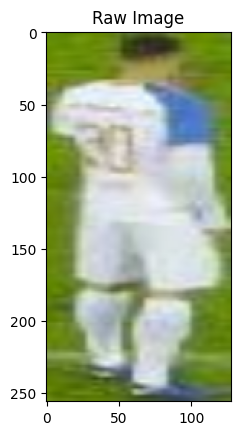

2025-03-21 19:44:25 [INFO] Running model chain on preprocessed image(s).
2025-03-21 19:44:25 [INFO] Classifying legibility of image(s) using pre-trained model.
2025-03-21 19:44:25 [WARNING] No soccer ball list found. Skipping exclusion of soccer balls.
2025-03-21 19:44:25 [INFO] Path checked: c:\Users\colin\OneDrive\Desktop\UBC\Jersey-Number-Recognition\data\SoccerNet\jersey-2023\processed_data\train\common_data\soccer_ball.json
2025-03-21 19:44:31 [INFO] Saving legible_tracklets to: c:\Users\colin\OneDrive\Desktop\UBC\Jersey-Number-Recognition\data\SoccerNet\jersey-2023\processed_data\train\1\legible_results.json
2025-03-21 19:44:31 [INFO] Saved legible_tracklets to: c:\Users\colin\OneDrive\Desktop\UBC\Jersey-Number-Recognition\data\SoccerNet\jersey-2023\processed_data\train\1\legible_results.json
2025-03-21 19:44:31 [INFO] Saving illegible_tracklets to: c:\Users\colin\OneDrive\Desktop\UBC\Jersey-Number-Recognition\data\SoccerNet\jersey-2023\processed_data\train\1\illegible_results.js

Phase 1: Data Pre-Processing Pipeline Progress: 100%|██████████| 2/2 [00:29<00:00, 14.94s/it]

2025-03-21 19:44:31 [INFO] Evaluating legibility results on 2 tracklets
2025-03-21 19:44:31 [INFO] Correct 2 out of 2. Accuracy 100.0%.
2025-03-21 19:44:31 [INFO] TP=2, TN=0, FP=0, FN=0
2025-03-21 19:44:31 [INFO] Precision=1.0, Recall=1.0
2025-03-21 19:44:31 [INFO] F1=1.0


In [3]:
pipeline.run_soccernet(
  num_tracklets=2,
  num_images_per_tracklet=1,
  run_soccer_ball_filter=True,
  generate_features=True,
  run_filter=True,
  run_legible=True,
  run_legible_eval=True,
  run_pose=False,
  run_crops=False,
  run_str=False,
  run_combine=False,
  run_eval=False)